# Iris Flower Dataset Exploratory Data Analysis
**Author:** Sanketh Kamath  
**Date:** 2025‑07‑28  
**Dataset:** Iris flower classification (4 features, 3 species, 150 samples)

### Objectives

1. Check data integrity (shape, types, missing values)  
2. Understand class distribution (samples per species)  
3. Preview feature distributions  
4. Outline next steps for detailed EDA

In [53]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = load_iris()
# Convert to dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)

# Labelling target
df['class'] = data.target

# Removing empty rows/col *not necessary for this dataset
print(df.isnull().sum())
df.dropna(how="all", inplace=True)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64


In [16]:
# Printing df
print(df.head())
print(df.info())
print(df['class'].value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4),

**Findings:**

- No missing values; all features are floats; species column is int  
- 50 samples each of setosa, versicolor, virginica.  
- DataFrame shape is (150, 5) including the species column.



### Univariate Analysis

In this section, we’ll explore the distribution and spread of each feature individually. This helps us understand central tendencies, variability, and potential outliers.

- Which feature has the widest range of values?
- Do any features vary a lot between species?
- Are any of the features skewed or have outliers?


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df.describe().T)

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
class              150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


In [ ]:
print(df.groupby('class').describe())
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

      sepal length (cm)                                              \
                  count   mean       std  min    25%  50%  75%  max   
class                                                                 
0                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

      sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                 count   mean  ...               75%  max            count   
class                          ...                                           
0                 50.0  3.428  ...             1.575  1.9             50.0   
1                 50.0  2.770  ...             4.600  5.1             50.0   
2                 50.0  2.974  ...             5.875  6.9             50.0   

                                                 
        mean       std  min  25%  50%  75%  max  
clas

**Observations:**

- Petal length has the greatest range and standard deviation
- In most petal measurements, class 0 is in a different range than 1 and 2, which have some overlap
- Sepal width seems to be pretty stable across classes, which makes it less predictive

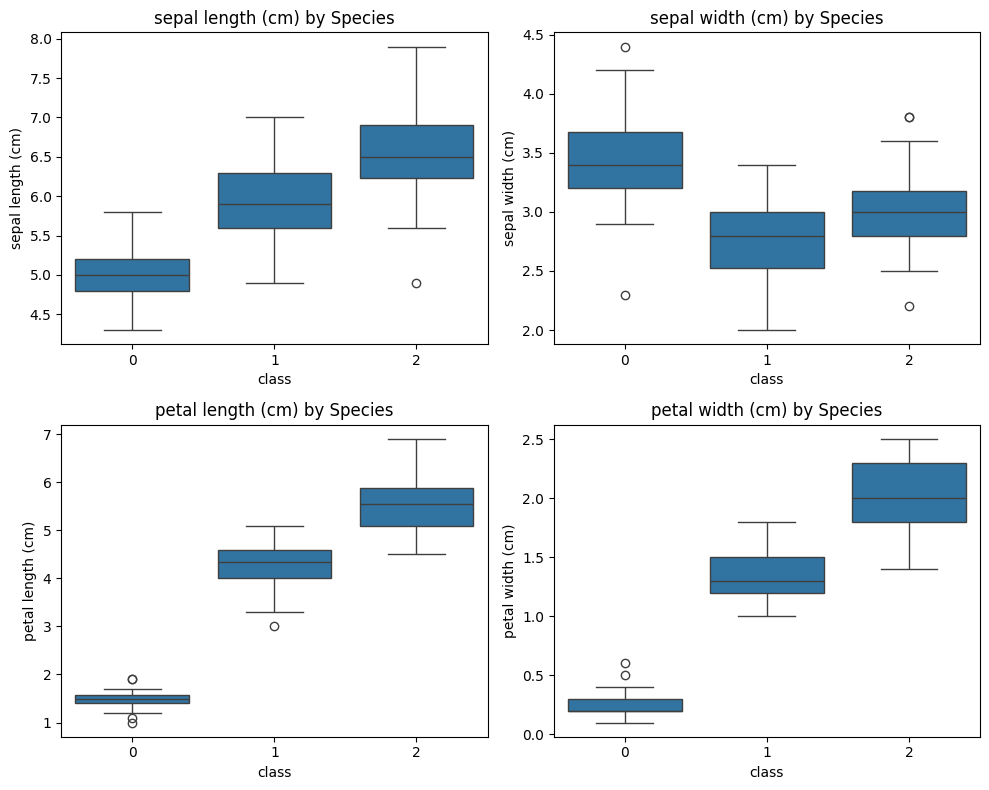

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, feature in zip(axes.flat, data.feature_names):
    sns.boxplot(x='class', y=feature, data=df, ax=ax)
    ax.set_title(f"{feature} by Species")

plt.tight_layout()
plt.show()

**Insights and Observations**

- Sepal length seems to be pretty normally distributed
- Setosa is easily distinguishable, especially in petal length and with
- Versicolor and Viriginica tend to overlap more, however this is less pronounced in petal features
- There no real data quality issues; Dataset is quite clean and easy to work with

### Bivariate Analysis: Pairwise Relationships

In this section, we’ll examine all pairwise relationships between features to see which combinations best separate the species.

- Which feature pairs show the clearest class clusters?
- Do any pairs reveal overlap that might make classification harder?
- Which species seem most/least separable?


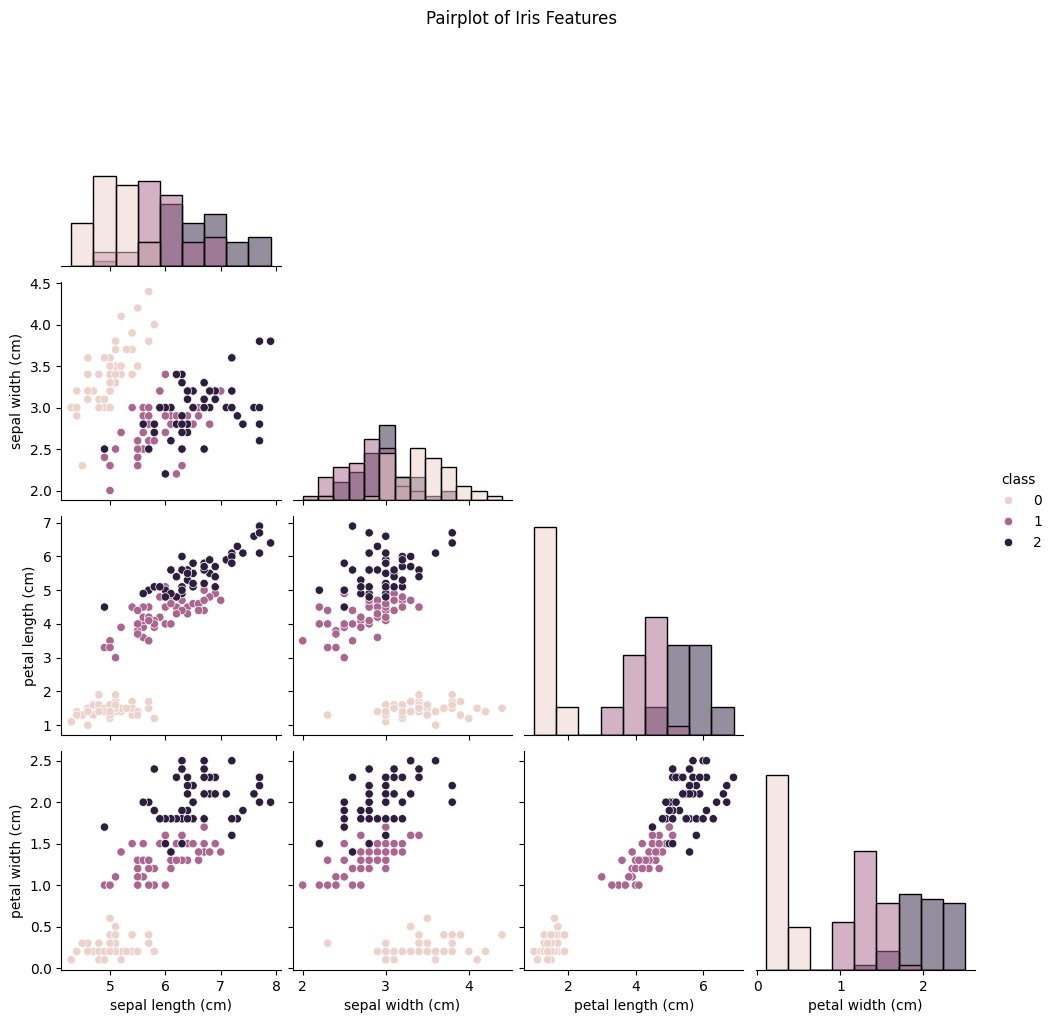

In [43]:
sns.pairplot(df, vars=df.columns[:-1], hue='class', diag_kind='hist', corner=True)
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

**Observations:**
- Setosa is isolated in all of these plots, so any classification with it would be easy
- Versicolor and Virginica tend to overlap more, especially in sepal features
- In my opinion, petal length vs. petal width has the least overlap, so we will deep dive into that

#### Deep Dive: Petal Length vs. Petal Width Scatterplot

- I expect petal length vs. petal width to cleanly separate setosa from the others.
- I predict some overlap between versicolor and virginica; let’s see how much.


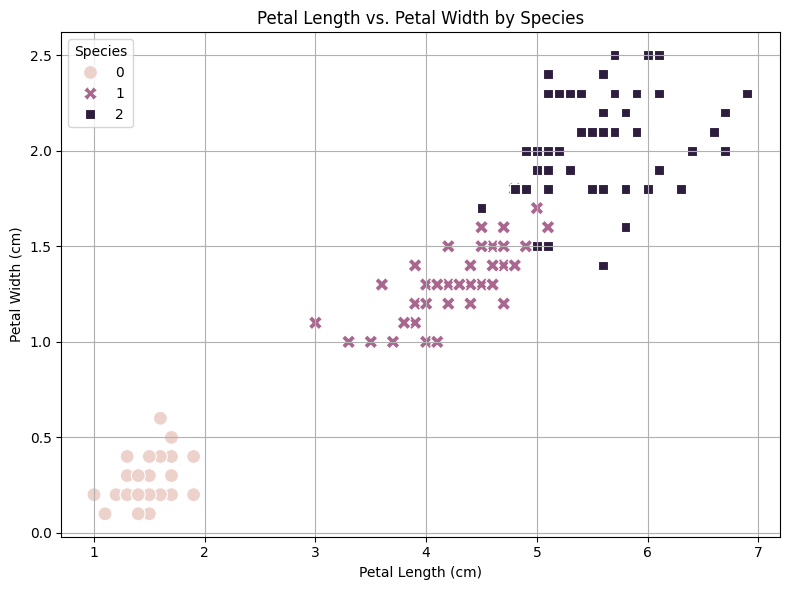

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='class',
    style='class',
    s=100,            
    data=df
)
plt.title("Petal Length vs. Petal Width by Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()


**Observations:**
- Setosa is less than 2 cm for Petal length and 0.75 cm for petal width, easy classification
- Vericolor and Virginica do have overlap between petal length 4.5 - 5.2 cm and petal width 1.4 - 1.7 cm

### Feature Correlation

We’ll compute the Pearson correlation coefficients between all feature pairs to see which features move together.

- Which feature pairs have a correlation coefficient |r| > 0.75?
- Could any pair be redundant for modeling?
- Does any strong correlation suggest the need for dimensionality reduction (e.g. PCA)?

In [48]:
corr_matrix = df.drop('class', axis=1).corr()
display(corr_matrix)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


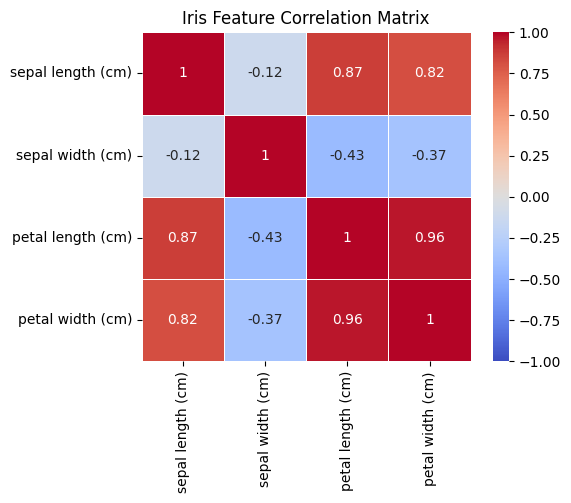

In [51]:
plt.figure(figsize=(6,5))
sns.heatmap(
    corr_matrix,
    annot=True,        
    cmap='coolwarm',  
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)
plt.title("Iris Feature Correlation Matrix")
plt.tight_layout()
plt.show()

**Observations**

- Sepal width has low correlation with all other features
- Petal width and petal width have high correlation *May drop one of these for linear models
- Sepal length has moderate correlation with petal length and lower correlation with petal width


### Derived Features

We’ll create a few new features to test if they yield better class separation than the raw measurements.

- Would the ratio petal_length / petal_width amplify differences between versicolor and virginica?
- Does taking a log or square of sepal measurements reveal any hidden patterns?
- How do these new features distribute across species?

In [54]:
df['petal ratio'] = df['petal length (cm)'] / df['petal width (cm)']
df['sepal ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df['petal sum'] = df['petal length (cm)'] + df['petal width (cm)']
df['sepal sum'] = df['sepal length (cm)'] + df['sepal width (cm)']
df['log sepal length'] = np.log(df['sepal length (cm)'])
df['log petal length'] = np.log(df['petal length (cm)'])
df['log petal width'] = np.log(df['petal width (cm)'])
df['log sepal width'] = np.log(df['sepal width (cm)'])
df['sq sepal length'] = np.square(df['sepal length (cm)'])
df['sq petal length'] = np.square(df['petal length (cm)'])
df['sq petal width'] = np.square(df['petal width (cm)'])
df['sq sepal width'] = np.square(df['sepal width (cm)'])


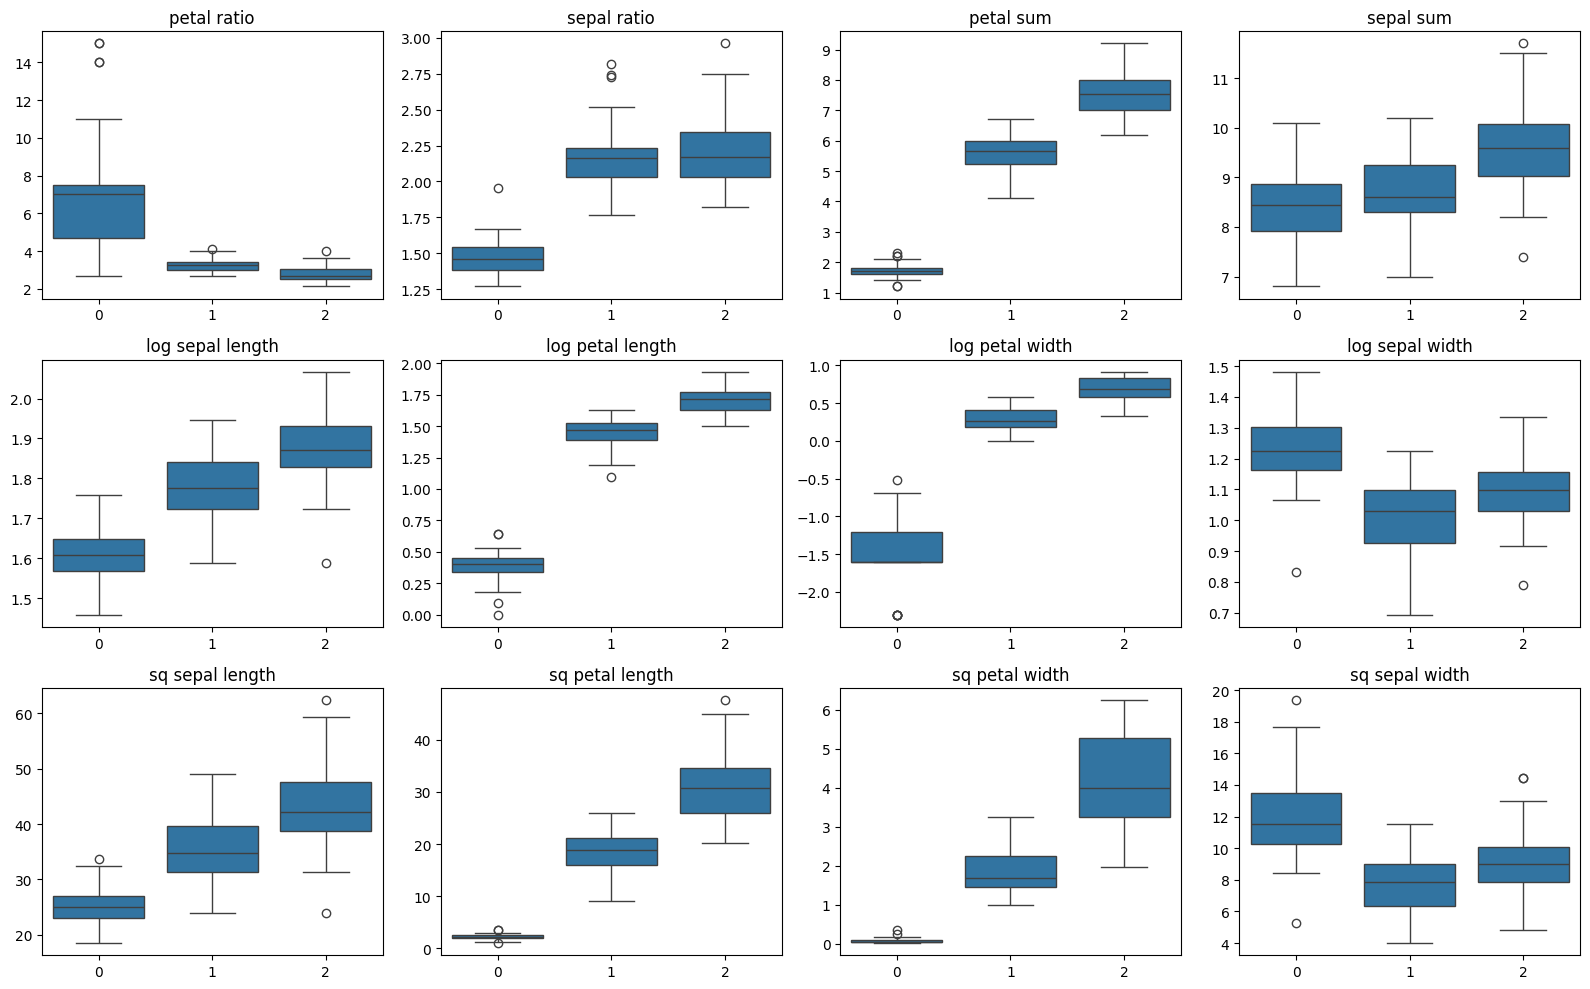

In [57]:
features = [
        'petal ratio', 'sepal ratio', 'petal sum', 'sepal sum', 
        'log sepal length', 'log petal length', 'log petal width', 'log sepal width',
        'sq sepal length', 'sq petal length', 'sq petal width', 'sq sepal width'
    ]
fig, axes = plt.subplots(3, 4, figsize=(16, 10), sharey=False)
for ax, feature in zip(axes.flatten(), features):
    sns.boxplot(x='class', y=feature, data=df, ax=ax)
    ax.set_title(feature)
    ax.set_xlabel('')        
    ax.set_ylabel('')  

plt.tight_layout()
plt.tight_layout()

**Observations**
- Petal sum, log petal length, log petal width, sq petal length, and sq petal width all have three almost non-overlapping medians. Any combination or transformation of petal length and width will be highly predictive and useful in a model
- Petal ratio does show a clearer separation of Versicolor and Virginica, but ratios can amplify and exaggerate noise *more variance
- Sepal changes don't provide clearer distinctions between Versicolor and Virginica than previous features